# Matplotlib & Seaborn

> Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. -- [Matplotlib](https://matplotlib.org)

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. -- [Seaborn](https://seaborn.pydata.org)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Tidy data

A [tidy dataset](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html) is a tabular dataset, where each type of observational unit is a table, each variable is a column and each observation is a row.

In [2]:
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head(10)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


## Bar chart

A bar chart is used for visualization of categorical (qualitative) variables, where each variable is a bar and its height indicates its frequency.

[`seaborn.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) is used to achieve this categorical chart.

P.S: For nominal data, it's common to sort in terms of frequency!

In [3]:
# The base_color is used in order to prevent different colors for each bar.
base_color = sns.color_palette()[0]

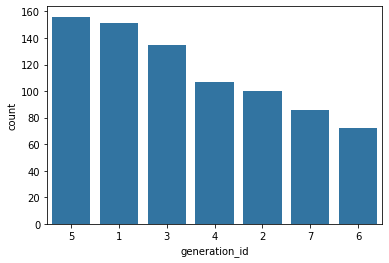

In [4]:
generation_order = pokemon['generation_id'].value_counts().index

sns.countplot(data = pokemon, x = 'generation_id', color = base_color, order = generation_order);

Sometimes it's also useful to rotate the chart 90 degress, so the categories are on the y-axis and the frequencies on the x-axis. With Seaborn, that's easily done simply by changing the parameter from `x` to `y`.

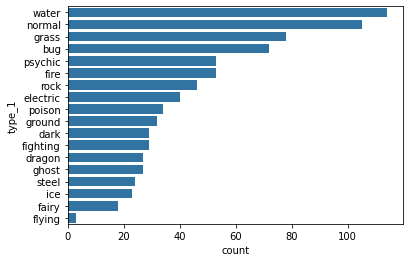

In [5]:
type_order = pokemon['type_1'].value_counts().index

sns.countplot(data = pokemon, y = 'type_1', color = base_color, order = type_order);

### Absolute vs. Relative frequency

There are times when showing the relative frequency can be of more interest than the absolute count. Matplotlib can help us in this task.

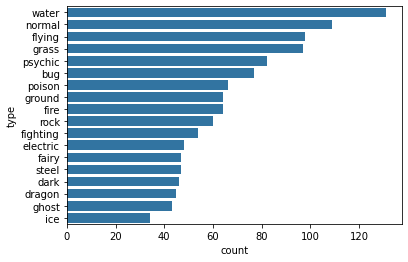

In [6]:
pokemon_types = pokemon.melt(id_vars = ['id', 'species'],
                             value_vars = ['type_1', 'type_2'],
                             var_name = 'type_level',
                             value_name = 'type')

type_counts = pokemon_types['type'].value_counts()
type_order = type_counts.index

sns.countplot(data = pokemon_types, y = 'type', color = base_color, order = type_order);

In [7]:
pokemon_count = type_counts.sum()
max_type_count = type_counts[0]
max_proportion = max_type_count / pokemon_count

ticks = np.arange(0, max_proportion, 0.02)
tick_labels = ['{:0.2f}'.format(v) for v in ticks]

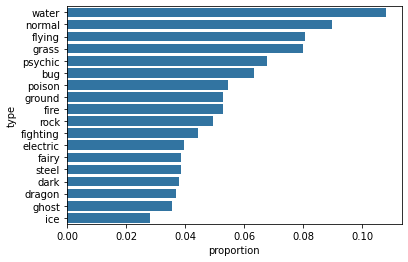

In [8]:
sns.countplot(data = pokemon_types, y = 'type', color = base_color, order = type_order)
plt.xticks(ticks * pokemon_count, tick_labels)
plt.xlabel('proportion');

We could also print the proportion on each bar, leaving the ticks with absolute counts.

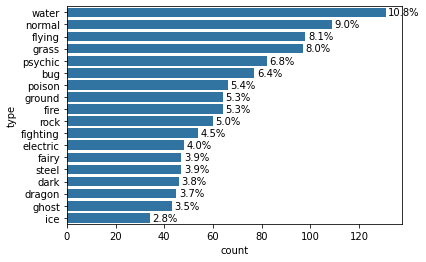

In [9]:
sns.countplot(data = pokemon_types, y = 'type', color = base_color, order = type_order);

for i in range (type_counts.shape[0]):
    count = type_counts[i]
    percentage_string = '{:0.1f}%'.format(100 * count / pokemon_count)
    plt.text(count + 1, i, percentage_string, va = 'center')

### `numpy.NaN`

We can choose to count the number of missing data (`None` and `numpy.NaN`) and plot a bar chart using `seaborn.barplot`.

In [10]:
sales_data = pd.read_csv('./sales-data.csv')
sales_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,05/07/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/07/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [11]:
print(sales_data.isna().sum())
print('')

na_counts = sales_data.drop(['Date', 'Temperature', 'Fuel_Price'], axis = 1).isna().sum()
print(na_counts)

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

Store              0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64


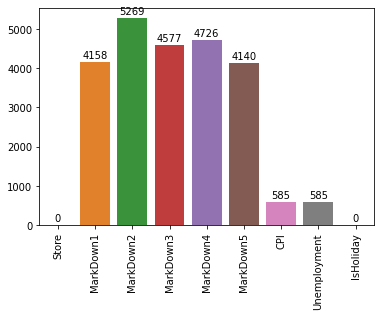

In [12]:
sns.barplot(na_counts.index, na_counts)
plt.xticks(rotation = 90)

for i in range(na_counts.shape[0]):
    count = na_counts[i]
    plt.text(i, count + 300, count, ha = 'center', va = 'top')

## Pie chart and donut plot

A pie chart (and donut plot) can be used to plot relative frequencies, but is best used when areas represent parts of a whole and when there only a few slices (two or three).

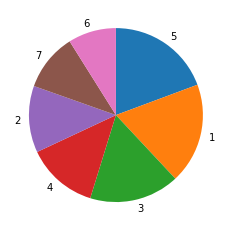

In [13]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False);

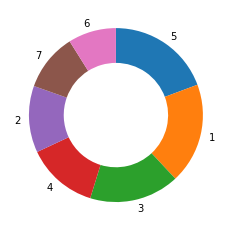

In [14]:
sorted_counts = pokemon['generation_id'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,
        wedgeprops = {'width': 0.4});

## Histograms

Histograms are used to plot distributions of a quantitative variable. However, unlike the bar chart, values are grouped into continuous bins.

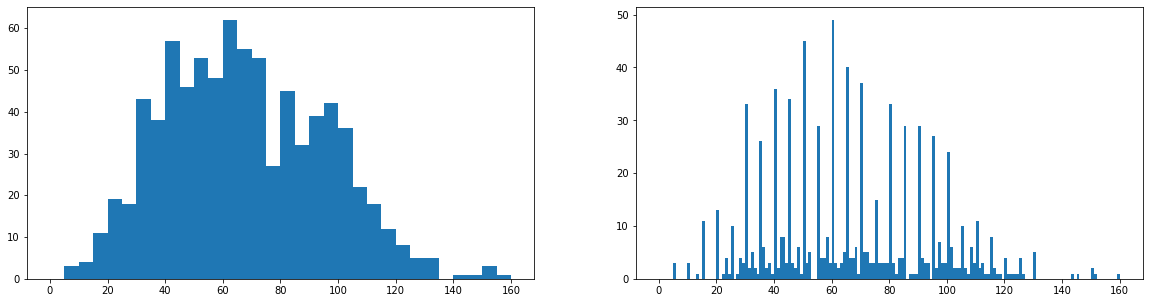

In [15]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['speed'].max() + 5, 5)
plt.hist(data = pokemon, x = 'speed', bins = bins);

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['speed'].max() + 1, 1)
plt.hist(data = pokemon, x = 'speed', bins = bins);

When plotting a discrete quantitative variable, it can help to put bin edges between actual values taken by data.

In [16]:
die_rolls = pd.read_csv('./die-rolls.csv')
die_rolls.head(10)

,Dice,Trial 1,Trial 2,Sum
0,1,4,1,5
1,2,4,5,9
2,3,2,6,8
3,4,6,3,9
4,5,3,6,9
5,6,6,6,12
6,7,3,3,6
7,8,3,2,5
8,9,2,6,8
9,10,6,6,12


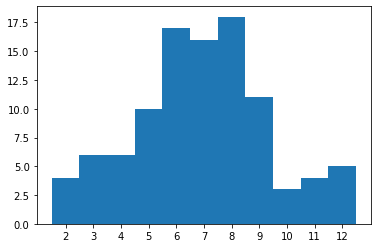

In [17]:
bins = np.arange(1.5, 12.5 + 1, 1)
plt.hist(data = die_rolls, x = 'Sum', bins = bins)
plt.xticks(np.arange(2, 12 + 1, 1));

It's also possible to add gaps between bars, by setting a width. This emphasis the fact that the data is discrete, but might cause it to be interpreted as ordinal.

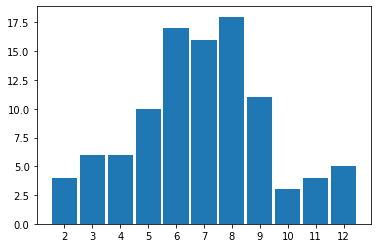

In [20]:
bins = np.arange(1.5, 12.5 + 1, 1)
plt.hist(data = die_rolls, x = 'Sum', bins = bins, rwidth = 0.9)
plt.xticks(np.arange(2, 12 + 1, 1));

Another important thing we can do is limit the boundaries of our plot, eliminating outliers or zooming in in interesting parts.

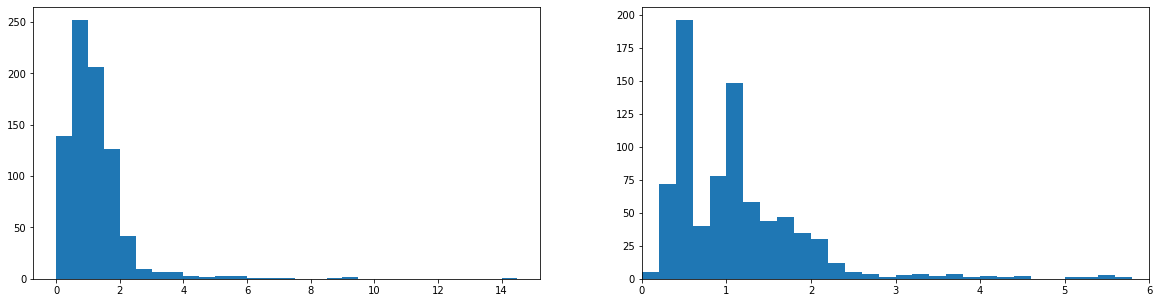

In [23]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
bins = np.arange(0, pokemon['height'].max() + 0.5, 0.5)
plt.hist(data = pokemon, x = 'height', bins = bins)

plt.subplot(1, 2, 2)
bins = np.arange(0, pokemon['height'].max() + 0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim([0, 6]);

Some distributions can be transformed (or scaled) to better show a linear model.

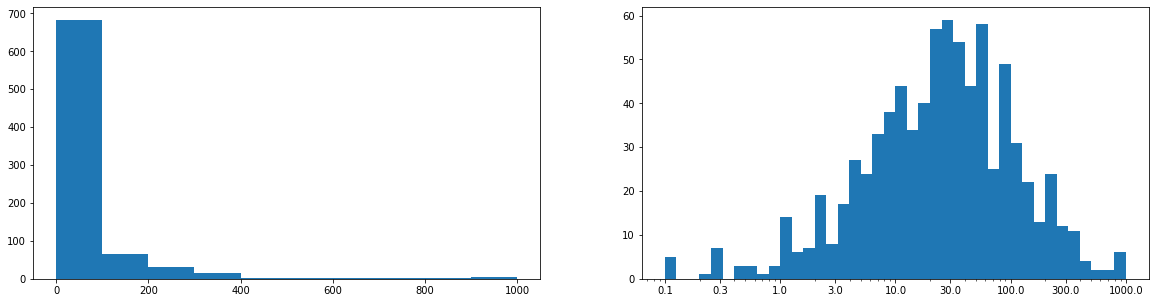

In [29]:
plt.figure(figsize = [20, 5])

plt.subplot(1, 2, 1)
plt.hist(data = pokemon, x = 'weight')

plt.subplot(1, 2, 2)
bins = 10 ** np.arange(-1, 3 + 0.1, 0.1)
ticks = np.array([0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000])
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, ticks);

For "discovering" the bins, the first thing to do is `DataFrame.describe` the data.

In [30]:
pokemon['weight'].describe()

count    807.000000
mean      61.771128
std      111.519355
min        0.100000
25%        9.000000
50%       27.000000
75%       63.000000
max      999.900000
Name: weight, dtype: float64

Since we're interested in the logarithmic transformation, we apply it on the result.

In [31]:
np.log10(pokemon['weight'].describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

The `min` and `max` values are the limits of the `numpy.arange`!